In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df= pd.read_csv(r"C:\Users\raval\Downloads\archive_prml\auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


# 1

In [11]:
df[["mpg","acceleration"]].corr()

,mpg,acceleration
mpg,1.000000,0.420289
acceleration,0.420289,1.000000


no, there is some positive relation(0.42) between mpg and acceleration but it is not high

# 2

In [13]:
df[["horsepower","cylinders"]].corr()

C:\Users\raval\AppData\Local\Temp\ipykernel_14236\161193007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[["horsepower","cylinders"]].corr()


,cylinders
cylinders,1.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [29]:
[np.where(df.horsepower.dtypes == "object")]

[(array([0], dtype=int64),)]

In [23]:
df.iloc[np.where(df.horsepower.dtypes == "object")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [24]:
df.iloc[np.where(df.horsepower.dtypes != "object")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [27]:
df.horsepower.iloc[0] 

'130'

In [39]:
df.drop([0],inplace=True)

In [40]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [41]:
df[["horsepower","cylinders"]].corr()

C:\Users\raval\AppData\Local\Temp\ipykernel_14236\161193007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[["horsepower","cylinders"]].corr()


,cylinders
cylinders,1.0


In [43]:
df['horsepower'] = pd.to_numeric(df['horsepower'],downcast="integer",errors="coerce")

In [44]:
df[["horsepower","cylinders"]].corr()

,horsepower,cylinders
horsepower,1.000000,0.843315
cylinders,0.843315,1.000000


very highly correlated

# 3

In [56]:
df[(df['cylinders'] == 8) & (df['model year'] == 70) & (df['car name'].str.contains('ford'))]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
25,10.0,8,360.0,215.0,4615,14.0,70,1,ford f250


# 4

In [59]:
df.corr()

C:\Users\raval\AppData\Local\Temp\ipykernel_14236\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775412,-0.803972,-0.778165,-0.831558,0.419133,0.578667,0.562894
cylinders,-0.775412,1.000000,0.950718,0.843315,0.896623,-0.503016,-0.344729,-0.561796
displacement,-0.803972,0.950718,1.000000,0.897265,0.932957,-0.542083,-0.367470,-0.608749
horsepower,-0.778165,0.843315,0.897265,1.000000,0.864397,-0.688857,-0.415239,-0.454509
weight,-0.831558,0.896623,0.932957,0.864397,1.000000,-0.416488,-0.305150,-0.580552
acceleration,0.419133,-0.503016,-0.542083,-0.688857,-0.416488,1.000000,0.284376,0.204102
model year,0.578667,-0.344729,-0.367470,-0.415239,-0.305150,0.284376,1.000000,0.178441
origin,0.562894,-0.561796,-0.608749,-0.454509,-0.580552,0.204102,0.178441,1.000000


In [71]:
(df.corr()>0.70) | (df.corr()<-0.70)

C:\Users\raval\AppData\Local\Temp\ipykernel_14236\4097179254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df.corr()>0.70) | (df.corr()<-0.70)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,True,True,True,True,True,False,False,False
cylinders,True,True,True,True,True,False,False,False
displacement,True,True,True,True,True,False,False,False
horsepower,True,True,True,True,True,False,False,False
weight,True,True,True,True,True,False,False,False
acceleration,False,False,False,False,False,True,False,False
model year,False,False,False,False,False,False,True,False
origin,False,False,False,False,False,False,False,True


In [77]:
# df.where([(df.corr()>0.70) | (df.corr()<-0.70)]== True)

# 5

In [47]:
df[df['model year'] == 80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
309,41.5,4,98.0,76.0,2144,14.7,80,2,vw rabbit
310,38.1,4,89.0,60.0,1968,18.8,80,3,toyota corolla tercel
311,32.1,4,98.0,70.0,2120,15.5,80,1,chevrolet chevette
312,37.2,4,86.0,65.0,2019,16.4,80,3,datsun 310
313,28.0,4,151.0,90.0,2678,16.5,80,1,chevrolet citation
314,26.4,4,140.0,88.0,2870,18.1,80,1,ford fairmont
315,24.3,4,151.0,90.0,3003,20.1,80,1,amc concord
316,19.1,6,225.0,90.0,3381,18.7,80,1,dodge aspen
317,34.3,4,97.0,78.0,2188,15.8,80,2,audi 4000
318,29.8,4,134.0,90.0,2711,15.5,80,3,toyota corona liftback


In [49]:
a=df[df['model year'] == 80]['cylinders'].value_counts()
a

4    25
6     2
5     1
3     1
Name: cylinders, dtype: int64

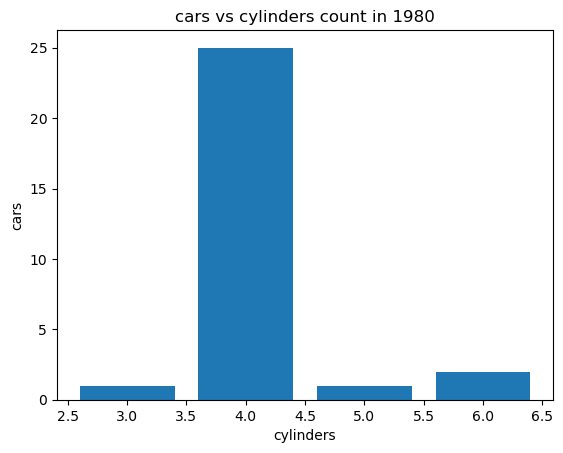

In [52]:
plt.bar(a.index, a.values)
plt.xlabel('cylinders')
plt.ylabel('cars')
plt.title('cars vs cylinders count in 1980')
plt.show()

# 6

In [78]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

horsepower column has missing values

In [91]:
df.iloc[np.where(df.horsepower.isnull()==True)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [92]:
df.horsepower.mean()

104.40409207161126

In [95]:
df.fillna(df.horsepower.mean(),inplace= True)

In [96]:
df.iloc[np.where(df.horsepower.isnull()==True)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [97]:
df1= pd.read_csv(r"C:\Users\raval\Downloads\archive_prml\auto-mpg.csv")

In [98]:
df1.cylinders.mean()

5.454773869346734

In [102]:
df1['horsepower'] = pd.to_numeric(df1['horsepower'],downcast="integer",errors="coerce")

In [103]:
df1.horsepower.mean()

104.46938775510205

In [106]:
df[df.iloc[np.where(df.horsepower.isnull()==True)]]["cylinders"]

1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
Name: cylinders, Length: 397, dtype: float64

In [107]:
(df1.horsepower.mean()*4/df1.cylinders.mean())

76.60767632709464

In [108]:
df1.horsepower.fillna((df1.horsepower.mean()*4/df1.cylinders.mean()),inplace=True)

In [109]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64